In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
import statsmodels.formula.api as smf
from pycaret.regression import *
from statsmodels.formula.api import ols
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML,Latex

In [29]:
data = pd.read_csv("data.csv")

In [45]:
data.head()

,Age,Age_Group,Gender,Favourite_Cookie,Cookies_bought_each_week,Customer ID
0,60,60_69,M,Choc chip,1,1001
1,53,50_59,M,Choc chip,1,1002
2,22,20_29,F,Choc chip,2,1003
3,30,30_39,F,Choc chip,6,1004
4,52,50_59,F,Macadamia,3,1005


In [51]:
#One hot encoding
dummies = []
cols = ['Age_Group', 'Gender', 'Favourite_Cookie']
for col in cols:
    dummies.append(pd.get_dummies(data[col]))
titanic_dummies = pd.concat(dummies, axis=1)
data = pd.concat((data,titanic_dummies), axis=1)

In [53]:
data.head()

,Age,Age_Group,Gender,Favourite_Cookie,Cookies_bought_each_week,Customer ID,10_19,20_29,30_39,40_49,50_59,60_69,F,M,Choc chip,Granola,Macadamia,Mint,Salted caramel,Triple choc
0,60,60_69,M,Choc chip,1,1001,0,0,0,0,0,1,0,1,1,0,0,0,0,0
1,53,50_59,M,Choc chip,1,1002,0,0,0,0,1,0,0,1,1,0,0,0,0,0
2,22,20_29,F,Choc chip,2,1003,0,1,0,0,0,0,1,0,1,0,0,0,0,0
3,30,30_39,F,Choc chip,6,1004,0,0,1,0,0,0,1,0,1,0,0,0,0,0
4,52,50_59,F,Macadamia,3,1005,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       46 non-null     int64 
 1   Age_Group                 46 non-null     object
 2   Gender                    46 non-null     object
 3   Favourite_Cookie          46 non-null     object
 4   Cookies_bought_each_week  46 non-null     int64 
 5   Customer ID               46 non-null     int64 
 6   10_19                     46 non-null     uint8 
 7   20_29                     46 non-null     uint8 
 8   30_39                     46 non-null     uint8 
 9   40_49                     46 non-null     uint8 
 10  50_59                     46 non-null     uint8 
 11  60_69                     46 non-null     uint8 
 12  F                         46 non-null     uint8 
 13  M                         46 non-null     uint8 
 14  Choc chip                 46

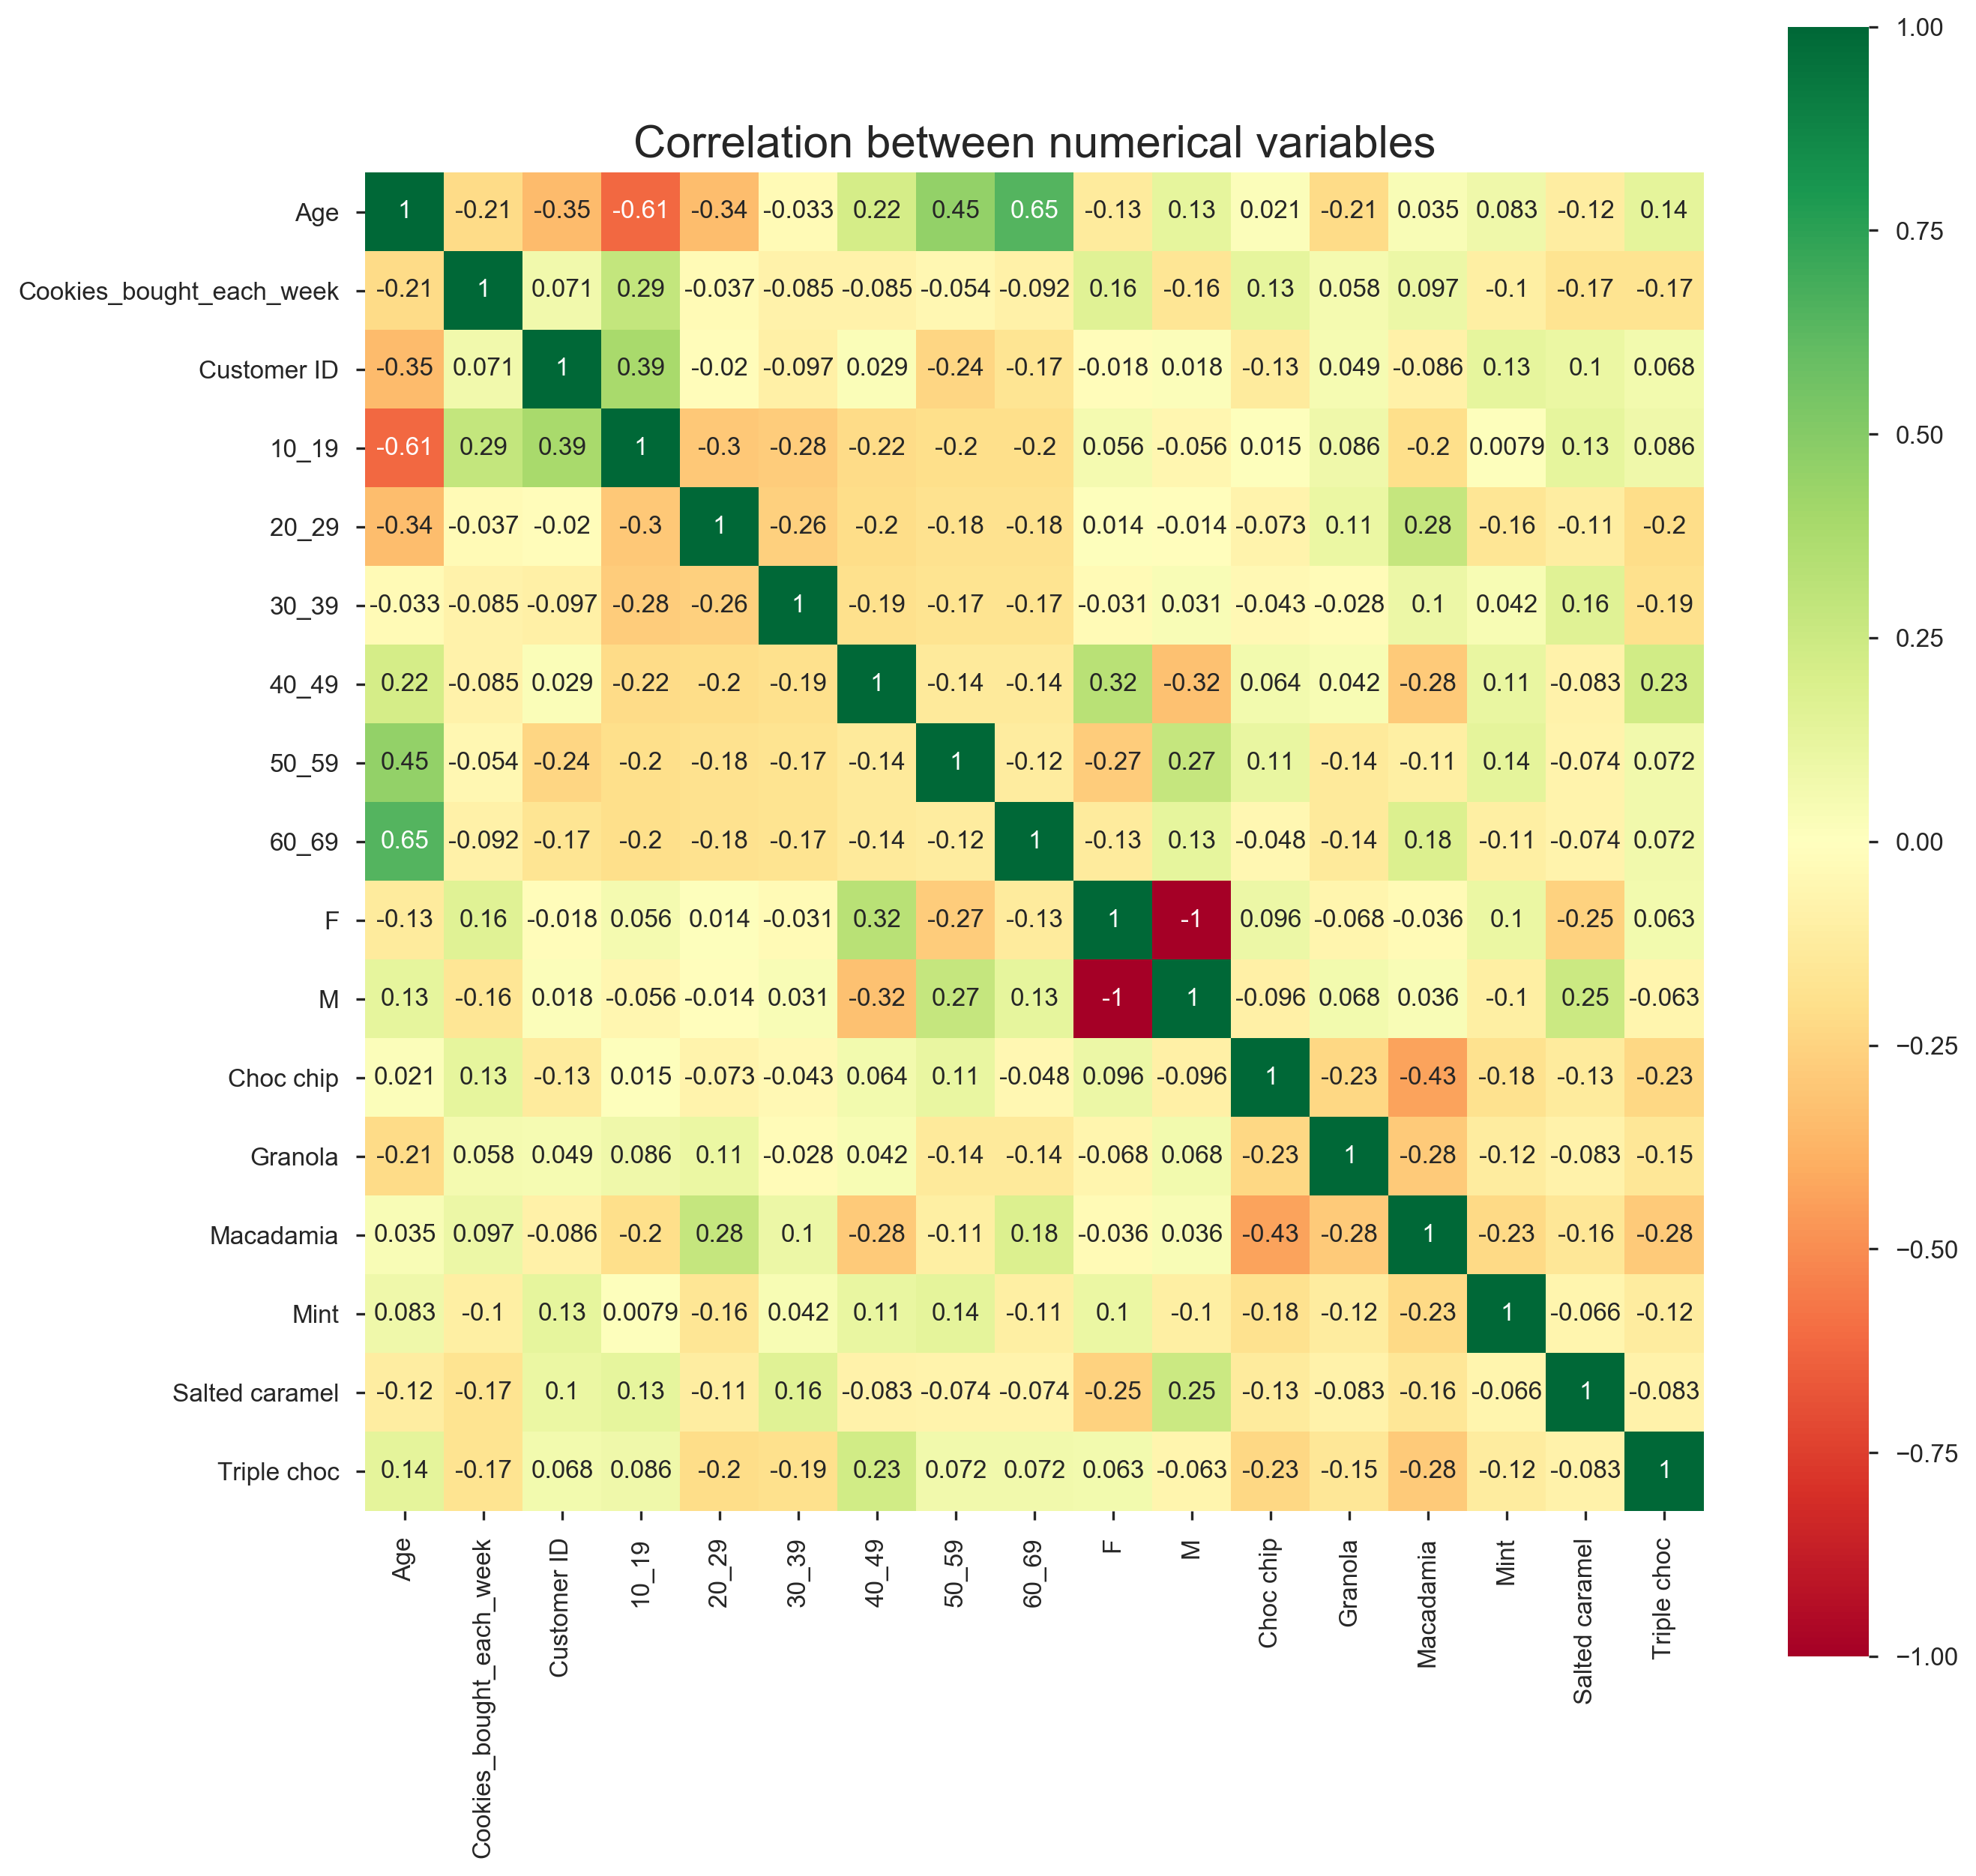

In [55]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), square=True, annot=True, cmap=plt.cm.RdYlGn, vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation between numerical variables', fontsize=18);

In [64]:
results = smf.ols('Cookies_bought_each_week ~   Age_Group+ Age + Gender + Favourite_Cookie ', data=data).fit()

In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Cookies_bought_each_week   R-squared:                       0.223
Model:                                  OLS   Adj. R-squared:                 -0.059
Method:                       Least Squares   F-statistic:                    0.7900
Date:                      Tue, 21 Jul 2020   Prob (F-statistic):              0.657
Time:                              23:27:56   Log-Likelihood:                -118.61
No. Observations:                        46   AIC:                             263.2
Df Residuals:                            33   BIC:                             287.0
Df Model:                                12                                         
Covariance Type:                  nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              6.4323      4.144      1.552      0.130      -1.999      14.863
Age_Group[T.20_29]                    -3.6171      2.476     -1.461      0.153      -8.654       1.419
Age_Group[T.30_39]                    -3.6339      4.239     -0.857      0.398     -12.258       4.991
Age_Group[T.40_49]                    -3.8783      6.503     -0.596      0.555     -17.108       9.352
Age_Group[T.50_59]                    -3.8248      9.390     -0.407      0.686     -22.929      15.280
Age_Group[T.60_69]                    -5.4193     11.378     -0.476      0.637     -28.567      17.729
Gender[T.M]                           -0.9254      1.350     -0.685      0.498      -3.672       1.821
Favourite_Cookie[T.Granola]           -0.1565      1.959     -0.080      0.937      -4.142       3.829
Favourite_Cookie[T.Macadamia]          0.3515      1.552      0.226      0.822      -2.807       3.510
Favourite_Cookie[T.Mint]              -2.3563      2.258     -1.044      0.304      -6.950       2.237
Favourite_Cookie[T.Salted caramel]    -3.8421      3.147     -1.221      0.231     -10.245       2.561
Favourite_Cookie[T.Triple choc]       -2.7569      1.948     -1.416      0.166      -6.719       1.206
Age                                    0.0452      0.236      0.192      0.849      -0.435       0.525
==============================================================================
Omnibus:                       26.269   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.987
Skew:                           1.643   Prob(JB):                     1.40e-11
Kurtosis:                       6.910   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
pd.crosstab(data["Favourite_Cookie"],data["Age_Group"],margins=True, normalize = 'index')

Age_Group,10_19,20_29,30_39,40_49,50_59,60_69
Favourite_Cookie,,,,,,
Choc chip,0.250000,0.166667,0.166667,0.166667,0.166667,0.083333
Granola,0.333333,0.333333,0.166667,0.166667,0.000000,0.000000
Macadamia,0.125000,0.375000,0.250000,0.000000,0.062500,0.187500
Mint,0.250000,0.000000,0.250000,0.250000,0.250000,0.000000
Salted caramel,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000
Triple choc,0.333333,0.000000,0.000000,0.333333,0.166667,0.166667
All,0.239130,0.217391,0.195652,0.130435,0.108696,0.108696


In [89]:
from pycaret.classification import *

In [90]:
exp_clf = setup(data, target = 'Favourite_Cookie')

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:12:47
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


ImportError: cannot import name '_check_psd_eigenvalues' from 'sklearn.utils.validation' (C:\Users\gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py)